<a href="https://colab.research.google.com/github/budennovsk/Pandas/blob/master/tenserfloy_%D0%BE%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D0%B5_%D0%BC%D0%BE%D0%B4%D0%B5%D0%BB%D0%B8_3_%D0%B3%D0%BE%D0%B4%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

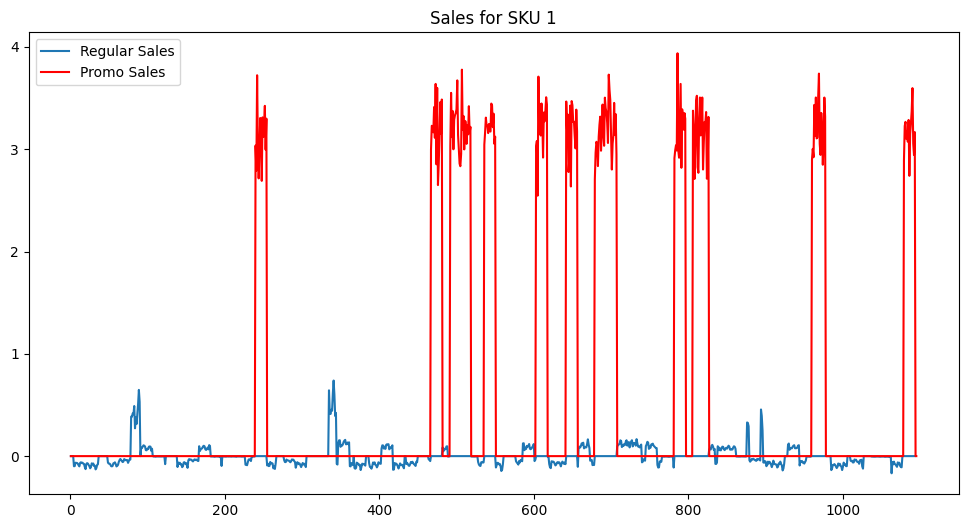

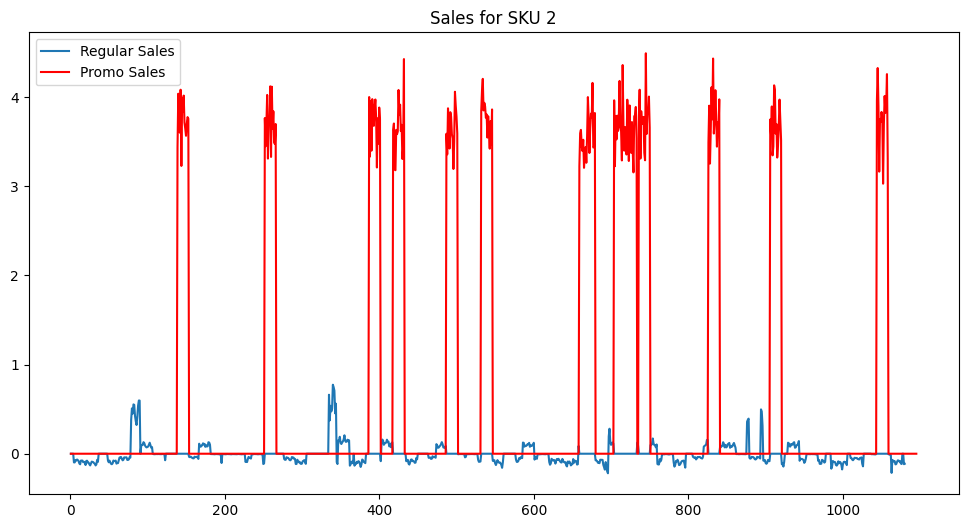

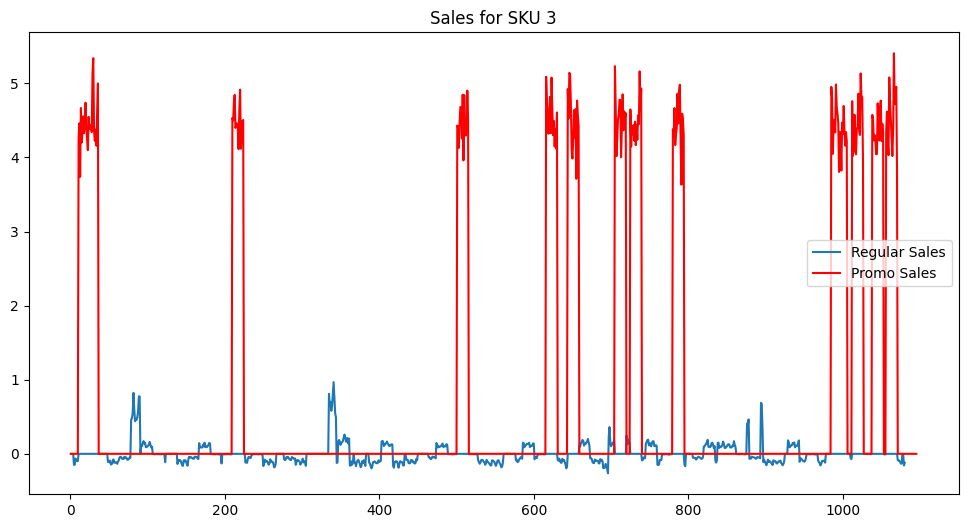

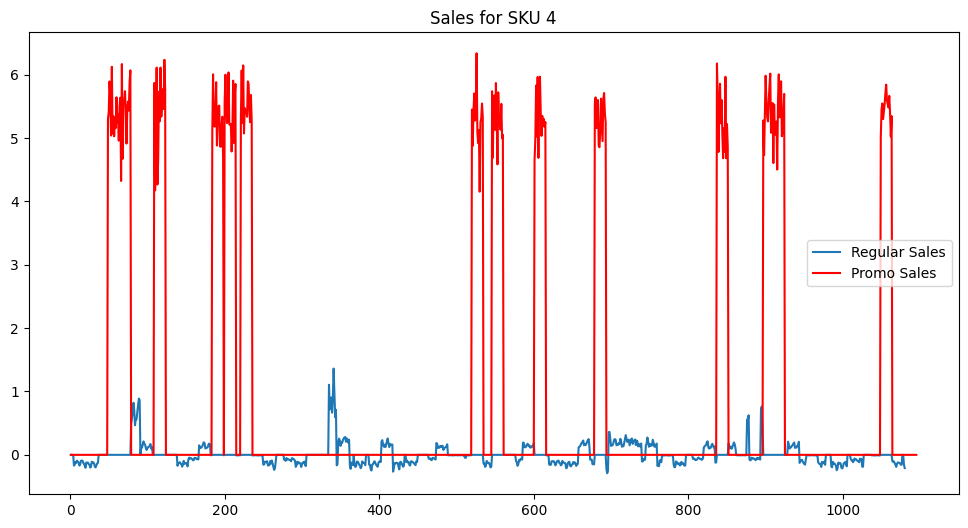

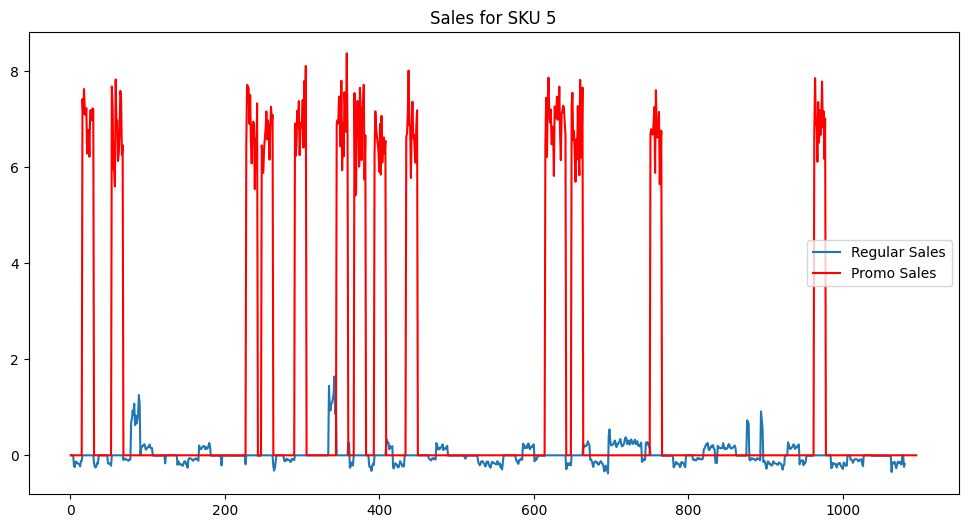

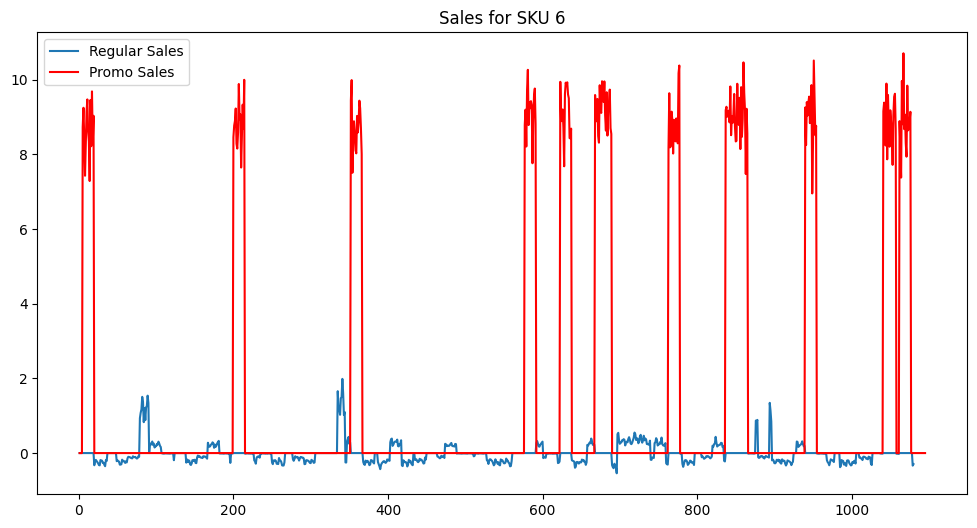

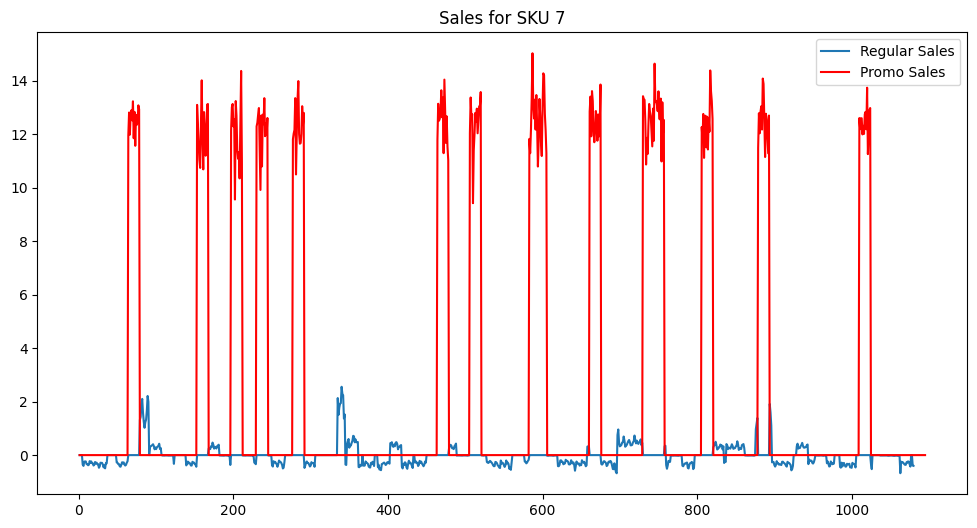

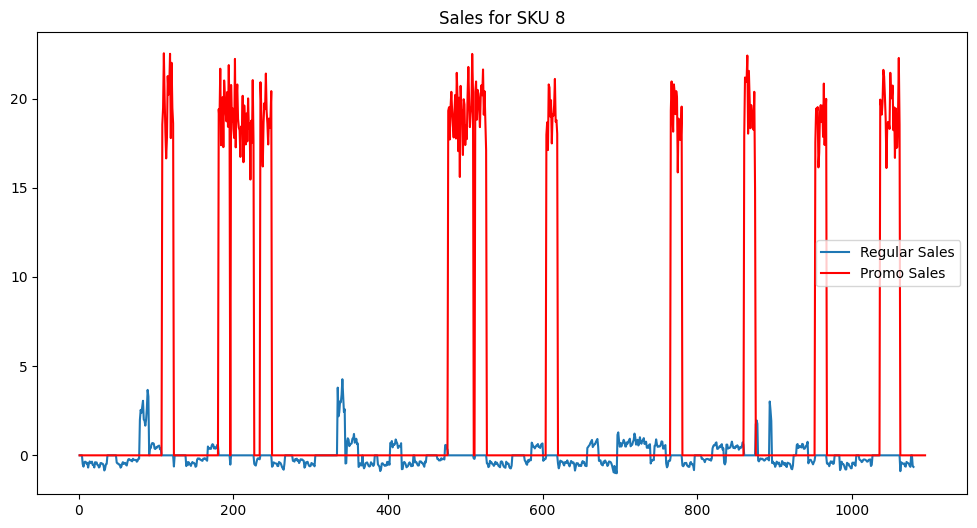

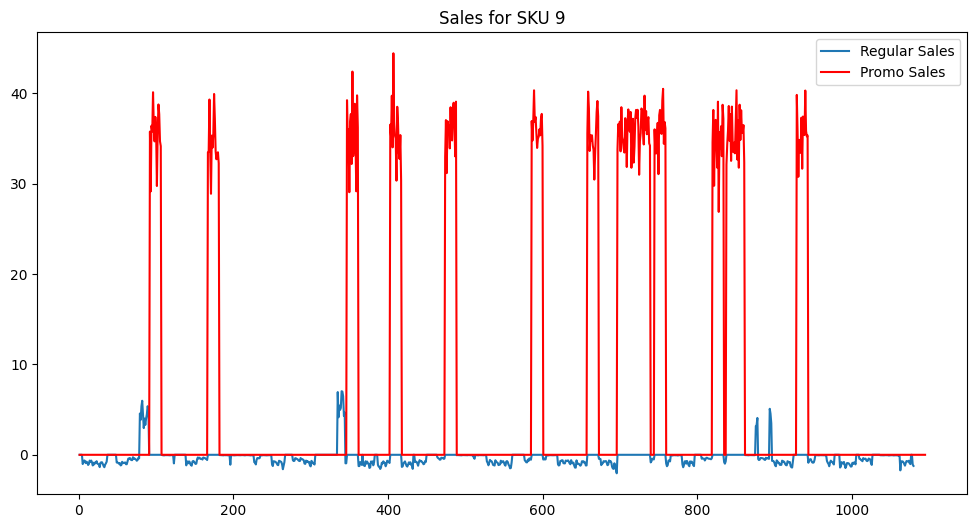

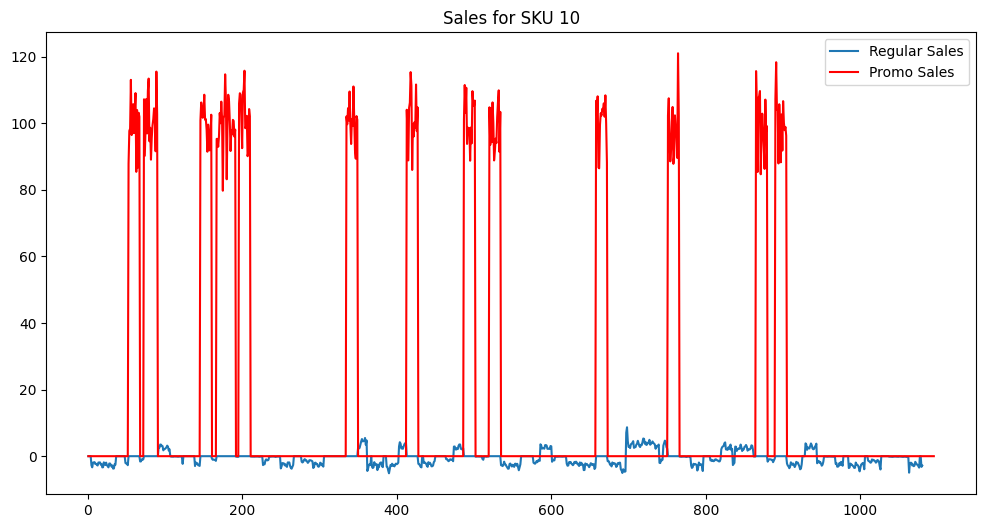

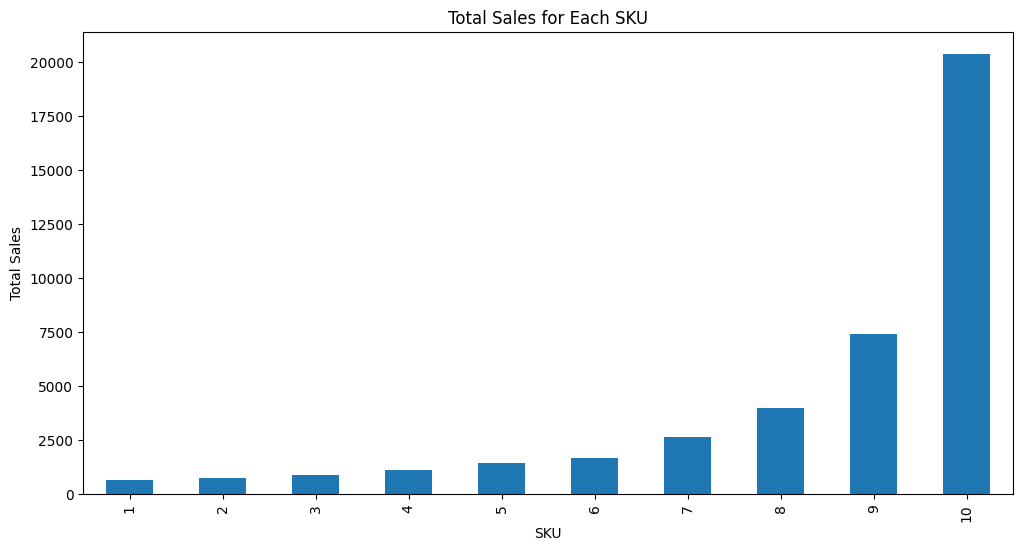

<ipython-input-1-69ce2890ae29>:228: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  weekly_sales = df.groupby('SKU').apply(lambda group: group.set_index('Date').resample('W').sum())
<ipython-input-1-69ce2890ae29>:228: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  weekly_sales = df.groupby('SKU').apply(lambda group: group.set_index('Date').resample('W').sum())
<ipython-input-1-69ce2890ae29>:228: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid fo

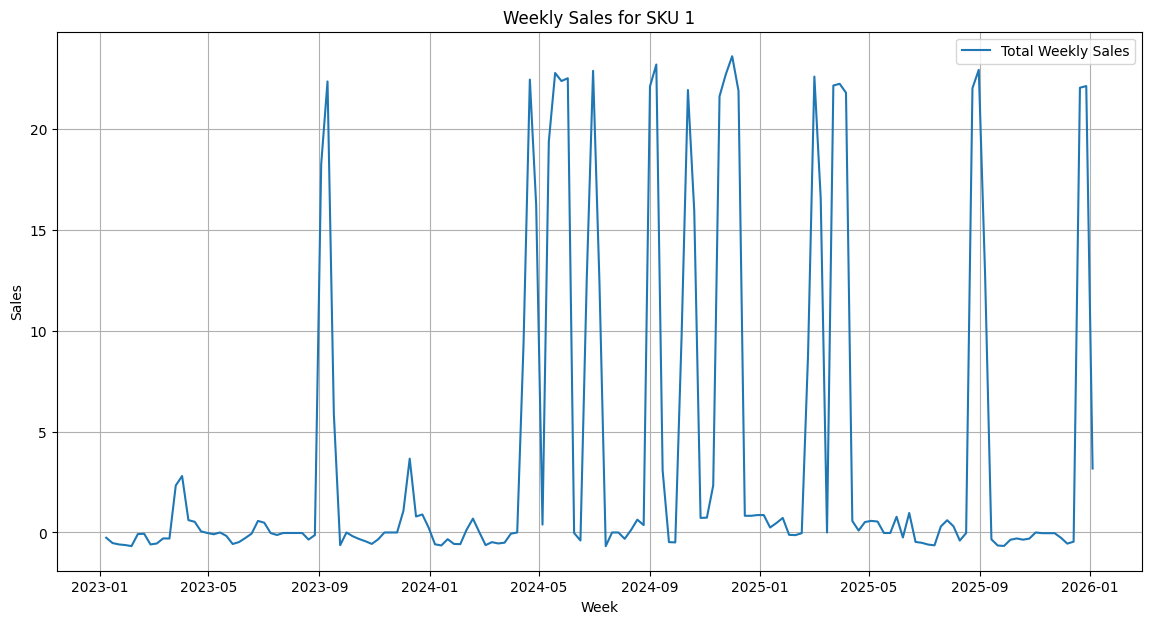

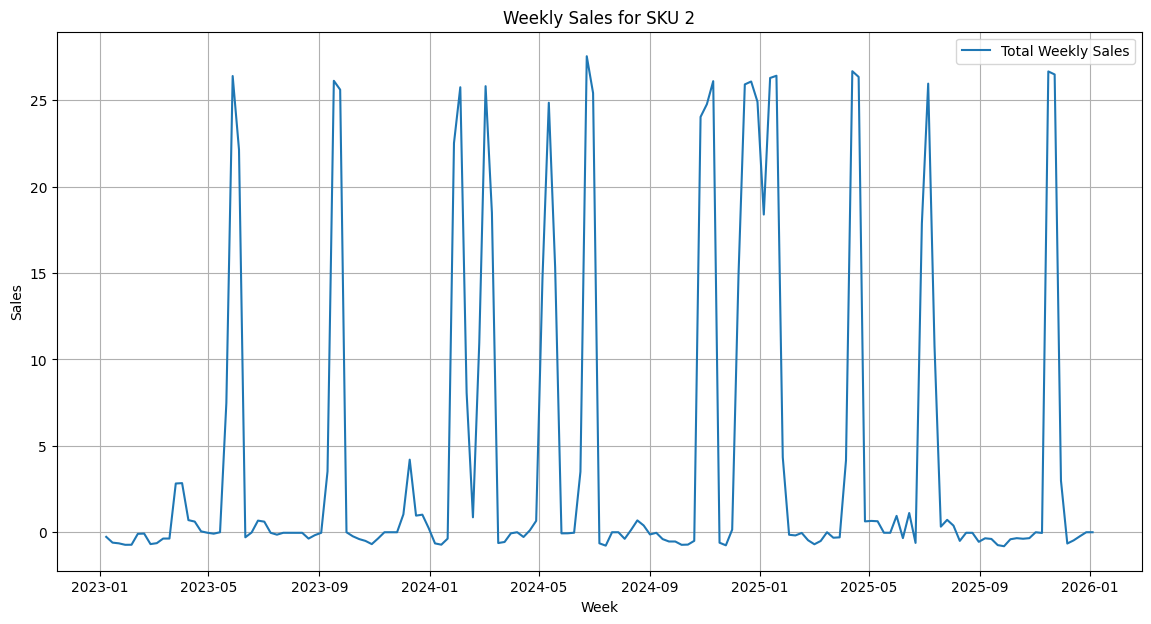

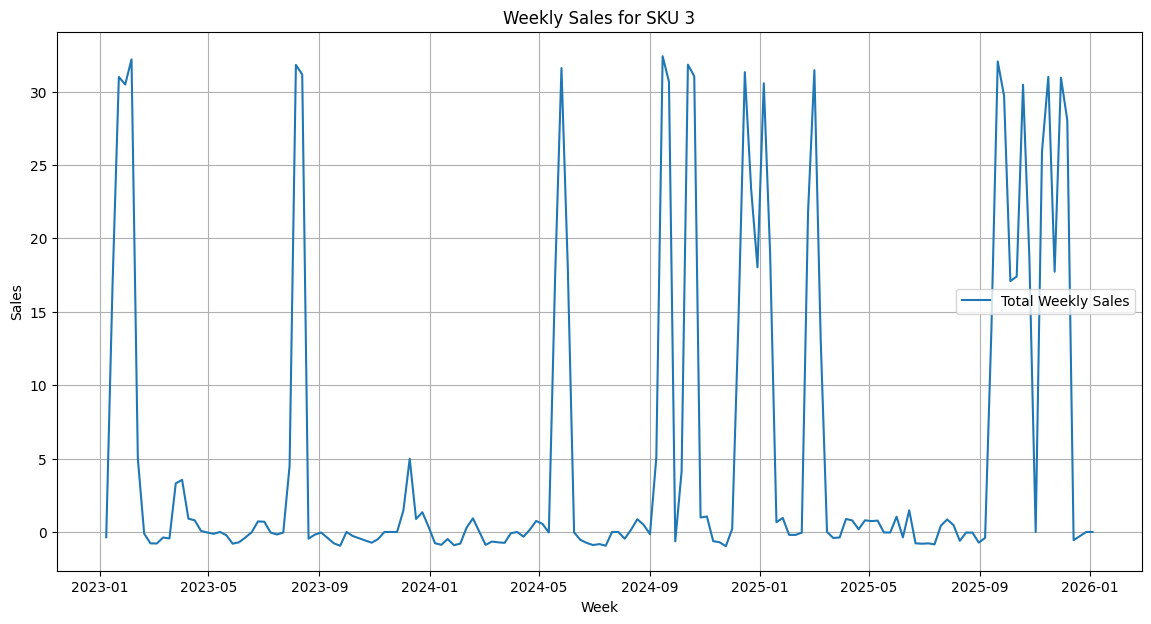

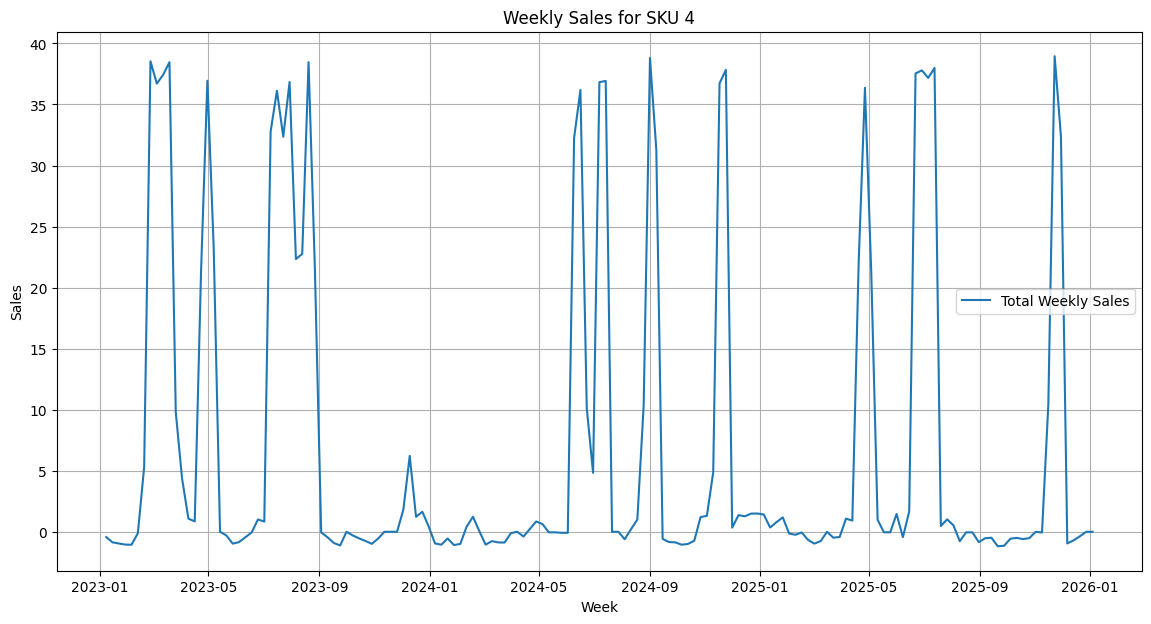

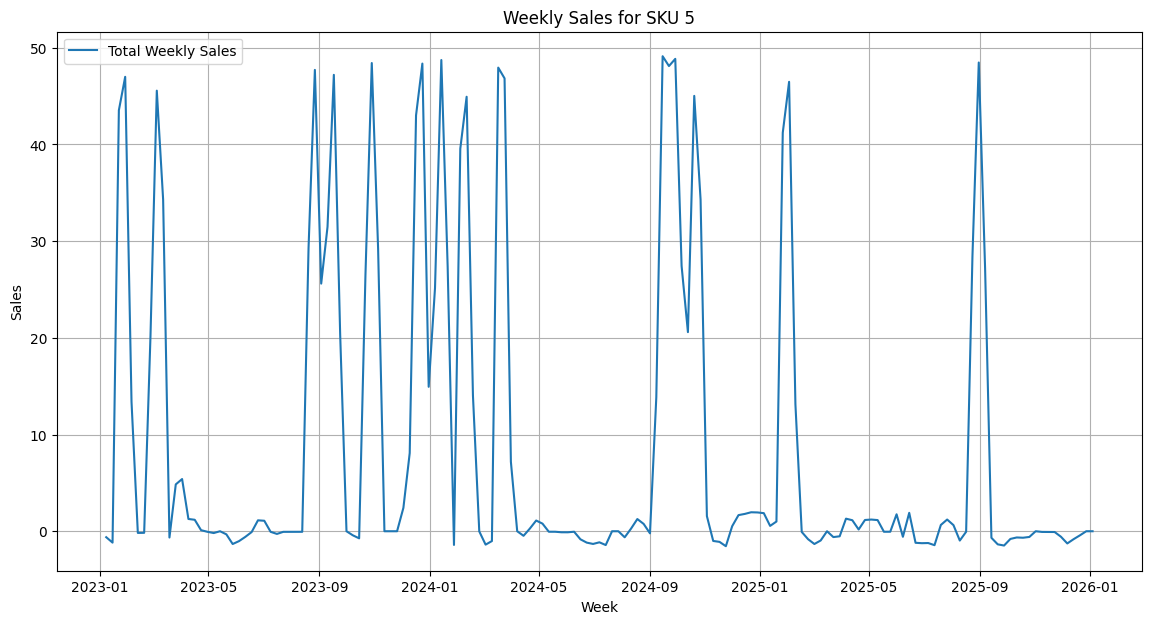

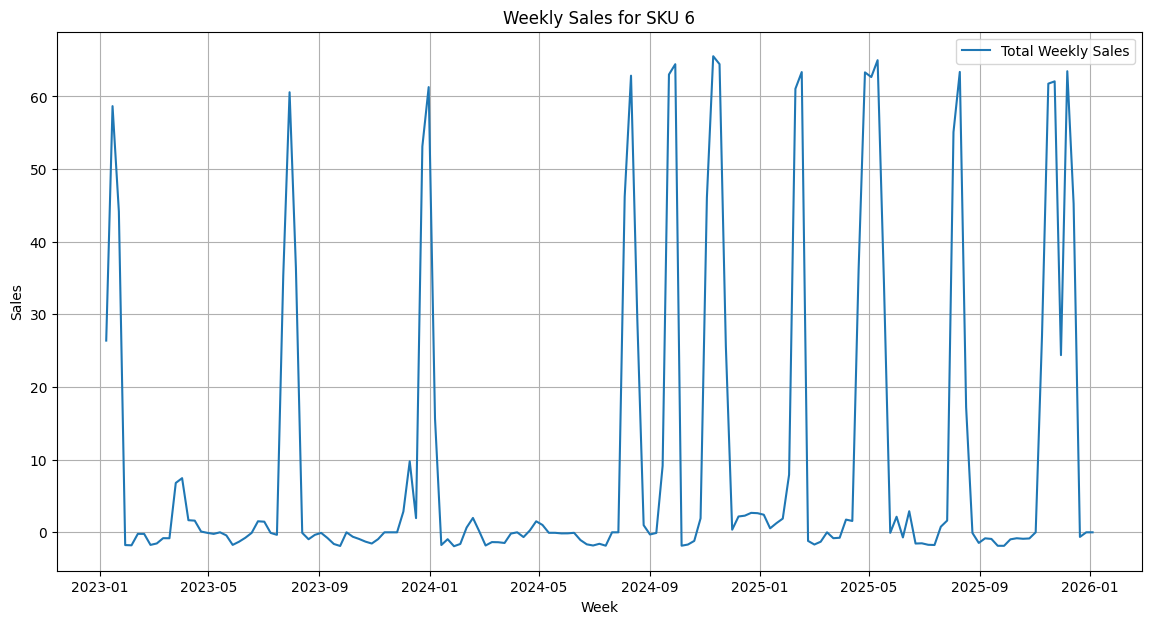

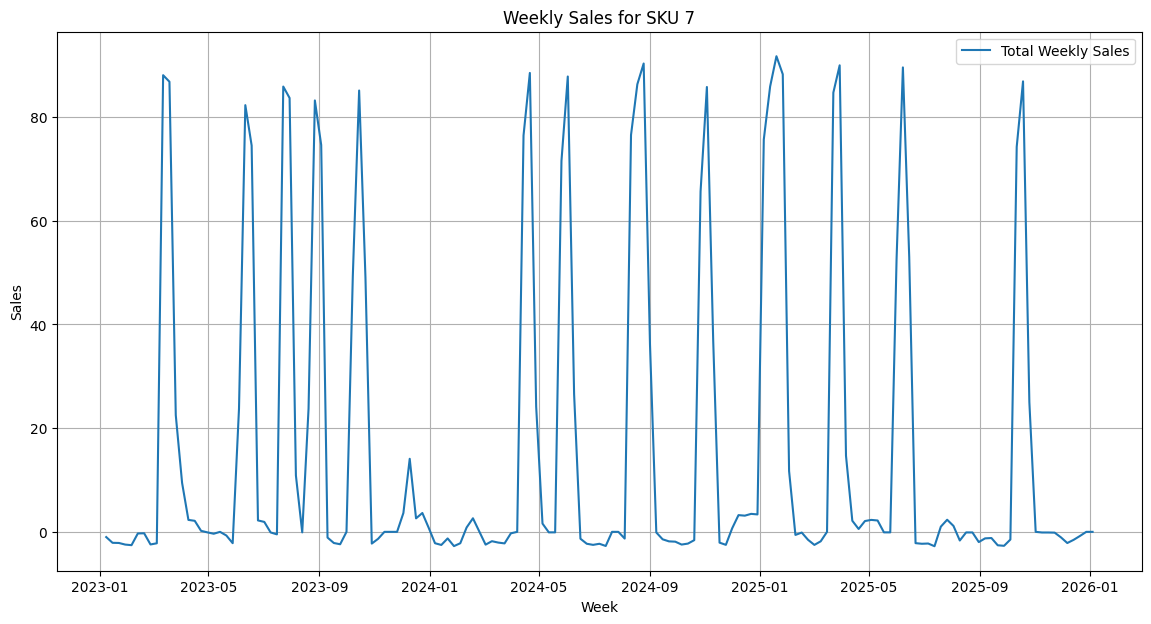

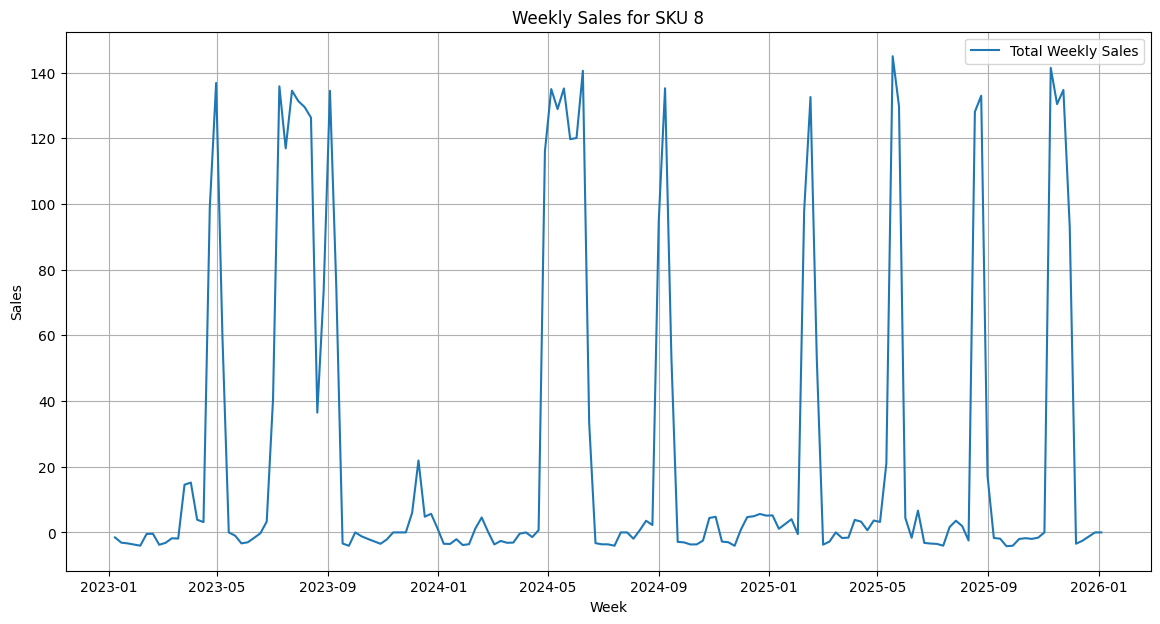

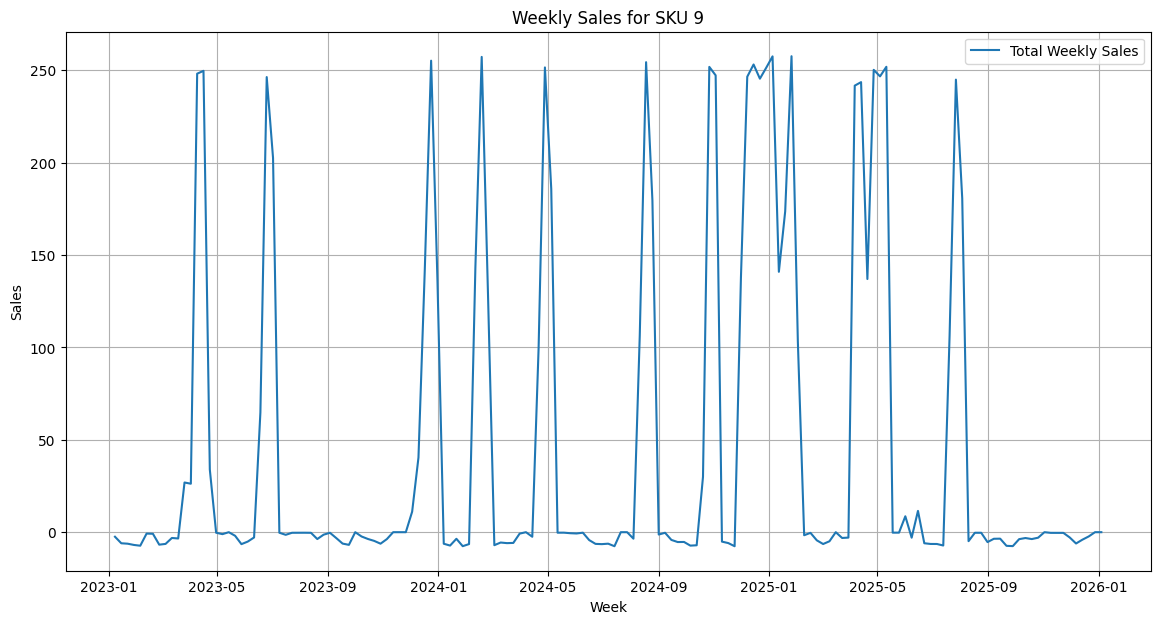

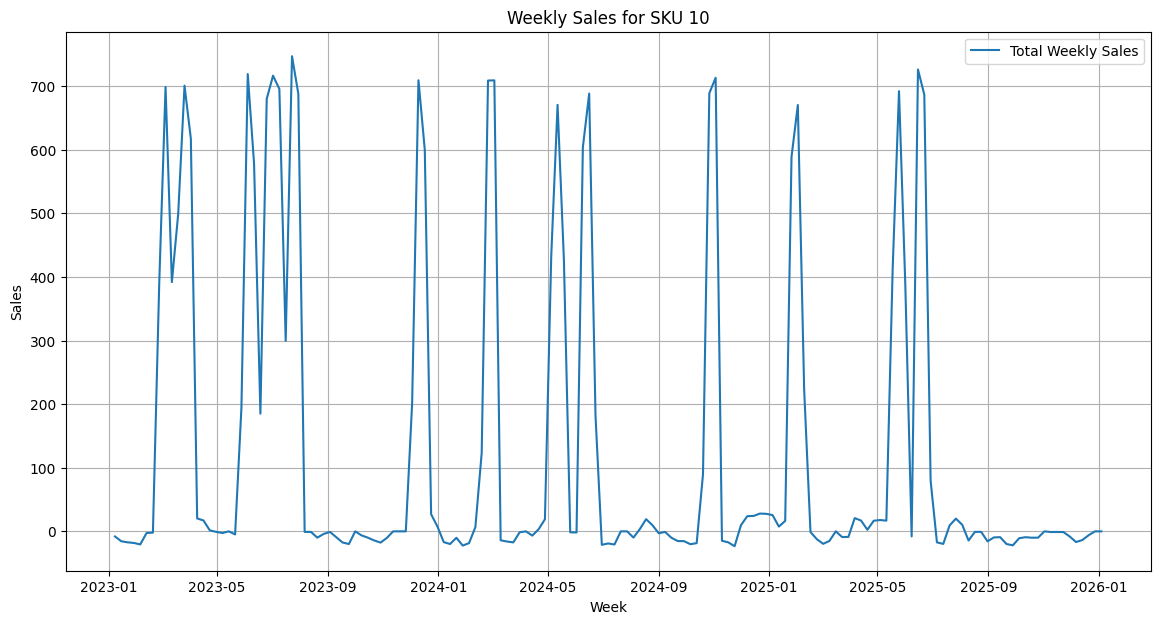

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Генерация данных
np.random.seed(0)

days = 1095
sku_count = 10


# Задаем веса для SKU согласно принципу Парето
pareto_weights = (np.arange(sku_count, 0, -1) ** -1.5)
pareto_weights /= pareto_weights.sum()


def calculate_influence(current_sku, other_sku, num_v):
    if num_v == 'min_v':
        return (current_sku/other_sku) * 0.6
    return 0.6 * (current_sku - 10 / 100)


all_sku = pareto_weights

# Пройдемся по всем SKU и сравним их
def influence():
    influences = [[] for _ in range(len(all_sku))]
    for i, current_sku in enumerate(all_sku):
        for j, other_sku in enumerate(all_sku):
            if current_sku != other_sku:
                if current_sku < other_sku:
                    influence = calculate_influence(current_sku, other_sku, 'min_v')
                    influences[i].append(f"sku_{j+1}_{i+1}: {influence}")
                else:
                    influence = calculate_influence(other_sku, current_sku, 'max_v')
                    influences[i].append(f"sku_{j+1}_{i+1}: {influence}")
    return influences

# Получаем значения влияния в виде вложенного списка с ключами
influences = influence()









def generate_promo_intervals():
    starts = np.sort(np.random.choice(np.arange(1, days - 15), size=15, replace=False))
    return [(start, start + 14) for start in starts]

promo_intervals_per_sku = {sku: generate_promo_intervals() for sku in range(1, sku_count + 1)}
# print(promo_intervals_per_sku)
data = {
    'Day': np.tile(np.arange(1, days + 1), sku_count),
    'SKU': np.repeat(np.arange(1, sku_count + 1), days),
    'Price': np.random.uniform(10, 200, size=days * sku_count),
    'Regular Sales': np.abs(np.random.normal(100, 10, days * sku_count) * np.repeat(pareto_weights, days)),
    'Promo Sales': np.zeros(days * sku_count),
    'Stock': np.random.randint(50, 200, size=days * sku_count)
}

df = pd.DataFrame(data)



new_dicts = []


data = promo_intervals_per_sku

# Создание нового словаря с замененными ключами
new_data = {f"sku_{key}": value for key, value in data.items()}


# Создание списка ключей из исходного словаря
keys = list(data.keys())

# Создание списка словарей без одной строки
new_dicts = []
d = 0
for i in range(len(keys)):
    d+=1
    new_dict = {f"sku_{key}_{d}": value for key, value in data.items() if key != keys[i]}
    new_dicts.append(new_dict)









# Недельная сезонность
недельные_коэффициенты = {
    0: 0.9,  # Понедельник
    1: 1.0,  # Вторник
    2: 1.0,  # Среда
    3: 1.1,  # Четверг
    4: 1.3,  # Пятница
    5: 1.5,  # Суббота
    6: 1.4   # Воскресенье
}

# Месячная сезонность
месячные_коэффициенты = {
    1: 1.2, 2: 1.1, 3: 1.0, 4: 0.9, 5: 0.9,
    6: 0.9, 7: 1.0, 8: 1.0, 9: 1.1, 10: 1.1,
    11: 1.2, 12: 1.3, 13: 1.2, 14: 1.1, 15: 1.0, 16: 0.9, 17: 0.9,
    18: 0.9, 19: 1.0, 20: 1.0, 21: 1.1, 22: 1.1,
    23: 1.2, 24: 1.3,
    25: 1.2, 26: 1.1, 27: 1.0, 28: 0.9, 29: 0.9, 30: 0.9,
    31: 1.0, 32: 1.0, 33: 1.1, 34: 1.1, 35: 1.2, 36: 1.3
}

# Праздничная сезонность
праздничные_коэффициенты = {
    1: 1.5,   # Новый год
    45: 1.2,  # День влюбленных
    95: 1.3,  # Пасха
    196: 1.4, # Летние распродажи
    333: 1.7, # Черная пятница
    359: 1.5,  # Рождество
    366: 1.5,   # Новый год
    410: 1.2,  # День влюбленных
    460: 1.3,  # Пасха
    561: 1.4, # Летние распродажи
    698: 1.7, # Черная пятница
    723: 1.5,  # Рождество
    731: 1.5,   # Новый год
    775: 1.2,  # День влюбленных
    825: 1.3,  # Пасха
    926: 1.4, # Летние распродажи
    1063: 1.7, # Черная пятница
    1089: 1.5,  # Рождество
}

def holiday_multiplier(day):
    for holiday, boost in праздничные_коэффициенты.items():
        days_before_holiday = holiday - day
        if 0 <= days_before_holiday <= 6:
            return 1 + (boost - 1) * (1 - days_before_holiday / 7)
    return 1

df['Weekday'] = df['Day'] % 7

df['Seasonality'] = df['Weekday'].map(недельные_коэффициенты)
df['Month'] = ((df['Day'] - 1) // 30) + 1
df['Monthly Seasonality'] = df['Month'].map(месячные_коэффициенты)
df['Holiday Boost'] = df['Day'].apply(holiday_multiplier)
df['Regular Sales'] *= df['Seasonality'] * df['Monthly Seasonality'] * df['Holiday Boost']

for sku, intervals in promo_intervals_per_sku.items():

    for start, end in intervals:


        mask = (df['SKU'] == sku) & (df['Day'] >= start) & (df['Day'] <= end)

        df.loc[mask, 'Price'] *= np.random.uniform(0.7, 0.8)
        promo_increase = np.abs(np.random.normal(200, 15, np.sum(mask)) * pareto_weights[sku-1])
        df.loc[mask, 'Promo Sales'] = promo_increase
        df.loc[mask, 'Regular Sales'] = 0

        other_skus_mask = (df['SKU'] != sku) & (df['Day'] >= start) & (df['Day'] <= end)
        desired_label = f"sku_{sku}___"
        desired_value = df.loc[other_skus_mask, 'SKU'].apply(lambda x: desired_label)

        df.loc[other_skus_mask, 'Desired'] = desired_value



df['index_promo'] = ''

# Iterate over the 'data' dictionary
for dos in new_dicts:
    for sku, ranges in dos.items():
        for start, end in ranges:
            # Expand the range and check if any value matches the 'DAYS' column
            matching_days = range(start, end + 1)
            df.loc[df['Day'].isin(matching_days), 'index_promo'] = sku

for sublist in influences:
    for item in sublist:
        key, value = item.split(': ')
        df.loc[df['index_promo'] == key, 'res_index_promo'] = float(value)
df['res_index_promo'].fillna(value=0, inplace=True)
df['result_1'] = df['Regular Sales'] * df['res_index_promo']
df['Regular Sales'] = df['Regular Sales'] * df['res_index_promo']



# Создание модели




for sku in range(1, sku_count + 1):
    plt.figure(figsize=(12, 6))
    subset = df[df['SKU'] == sku]
    plt.plot(subset['Day'], subset['Regular Sales'], label='Regular Sales')
    plt.plot(subset['Day'], subset['Promo Sales'], label='Promo Sales', color='red')
    plt.title(f"Sales for SKU {sku}")
    plt.legend()
    plt.show()

# Суммарные продажи по SKU
total_sales_per_sku = df.groupby('SKU')[['Regular Sales', 'Promo Sales']].sum().sum(axis=1)
plt.figure(figsize=(12, 6))
total_sales_per_sku.plot(kind='bar')
plt.title("Total Sales for Each SKU")
plt.ylabel("Total Sales")
plt.xlabel("SKU")
plt.show()






# Добавим столбец 'Date', чтобы использовать его для группировки по неделям
df['Date'] = pd.to_datetime(df['Day'], origin='2023-01-01', unit='D')

# Группируем по SKU и неделям, затем суммируем продажи
weekly_sales = df.groupby('SKU').apply(lambda group: group.set_index('Date').resample('W').sum())

# Отрисовка графиков недельных продаж для каждого SKU
for sku in range(1, sku_count + 1):
    plt.figure(figsize=(14, 7))

    # Выбор нужного SKU из отсортированных данных
    subset = weekly_sales.loc[sku]

    # Рисуем график недельных продаж
    plt.plot(subset.index, subset['Regular Sales'] + subset['Promo Sales'], label='Total Weekly Sales')
    plt.title(f"Weekly Sales for SKU {sku}")
    plt.ylabel("Sales")
    plt.xlabel("Week")
    plt.legend()
    plt.grid(True)
    plt.show()


In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Индексы строк с пропущенными значениями
df.copy()
# Замена значений NaN на 0
df = df.fillna(0)


SEQ_LENGTH = 10

def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:(i + seq_length)]
        y = data[i + seq_length, -2]  # -2 так как 'Sales' находится перед 'Stock'
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

sku_data = {}
for sku in range(1, sku_count + 1):
    sku_df = df[df['SKU'] == sku]
    X, y = create_sequences(sku_df[['Price', 'Regular Sales', 'Stock']].values, SEQ_LENGTH)
    sku_data[sku] = (X, y)




In [ ]:

from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error

model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(SEQ_LENGTH, 3), return_sequences=True))
model.add(LSTM(32, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

for sku, (X, y) in sku_data.items():
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

    predictions = model.predict(X_test)
    # Вычисление ошибки MSE
    mse = mean_squared_error(y_test,predictions)

    print(f"Среднеквадратичная ошибка (MSE) номер {sku}:", mse)
    # Оценка модели на тестовом наборе


Epoch 1/5
28/28 [==============================] - 7s 45ms/step - loss: 6.8724 - val_loss: 0.4247
Epoch 2/5
28/28 [==============================] - 0s 13ms/step - loss: 0.1662 - val_loss: 0.1412
Epoch 3/5
28/28 [==============================] - 0s 15ms/step - loss: 0.0497 - val_loss: 0.0669
Epoch 4/5
28/28 [==============================] - 0s 14ms/step - loss: 0.0218 - val_loss: 0.0456
Epoch 5/5
7/7 [==============================] - 0s 15ms/step
Среднеквадратичная ошибка (MSE) номер 1: 0.03103567982596628
Epoch 1/5
28/28 [==============================] - 2s 57ms/step - loss: 0.0249 - val_loss: 0.0185
Epoch 2/5
28/28 [==============================] - 1s 44ms/step - loss: 0.0125 - val_loss: 0.0154
Epoch 3/5
28/28 [==============================] - 1s 27ms/step - loss: 0.0111 - val_loss: 0.0151
Epoch 4/5
28/28 [==============================] - 1s 25ms/step - loss: 0.0107 - val_loss: 0.0149
Epoch 5/5
7/7 [==============================] - 0s 4ms/step
Среднеквадратичная ошибка (MSE) 

In [ ]:


def predict_next_n_days(model, initial_data, n_days):
    predicted_data = []
    current_input = initial_data.copy()

    for _ in range(n_days):
        predicted_value = model.predict(np.expand_dims(current_input, axis=0))[0, 0]
        predicted_value = np.maximum(predicted_value, 0)

        new_input = np.roll(current_input, shift=-1, axis=0)
        new_input[-1, 0] = current_input[-1, 0]  # цена
        new_input[-1, 1] = predicted_value       # продажи
        new_input[-1, 2] = current_input[-1, 2]  # остаток

        current_input = new_input
        predicted_data.append(predicted_value)

    return np.array(predicted_data)

predictions = {}
for sku in range(1, sku_count + 1):
    last_data = df[df['SKU'] == sku][['Price', 'Regular Sales', 'Stock']].values[-SEQ_LENGTH:]
    predictions[sku] = predict_next_n_days(model, last_data, 270)


1/1 [==============================] - 0s 22ms/step


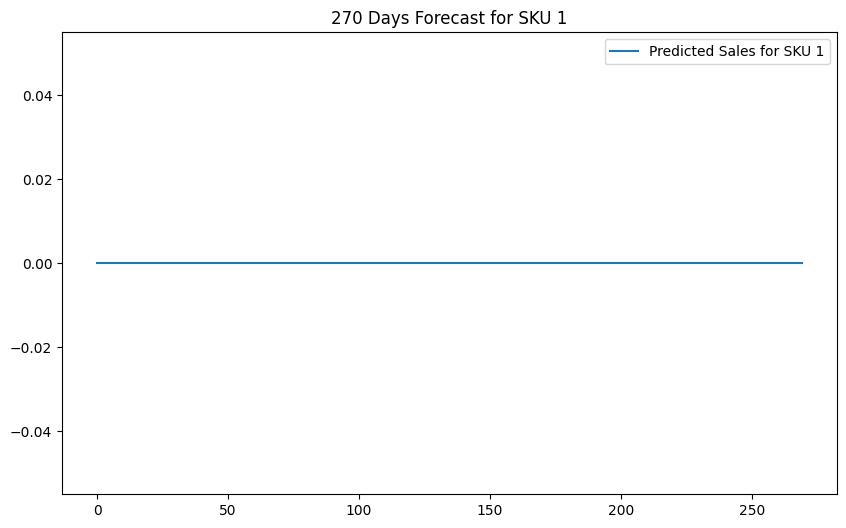

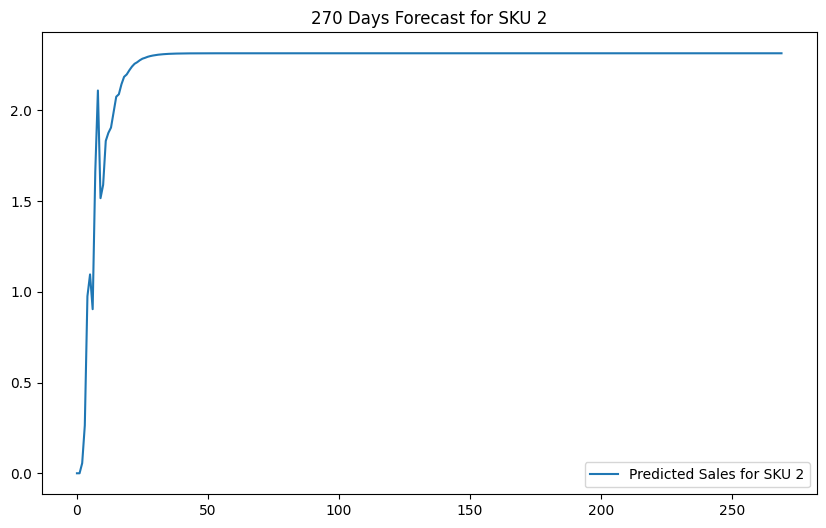

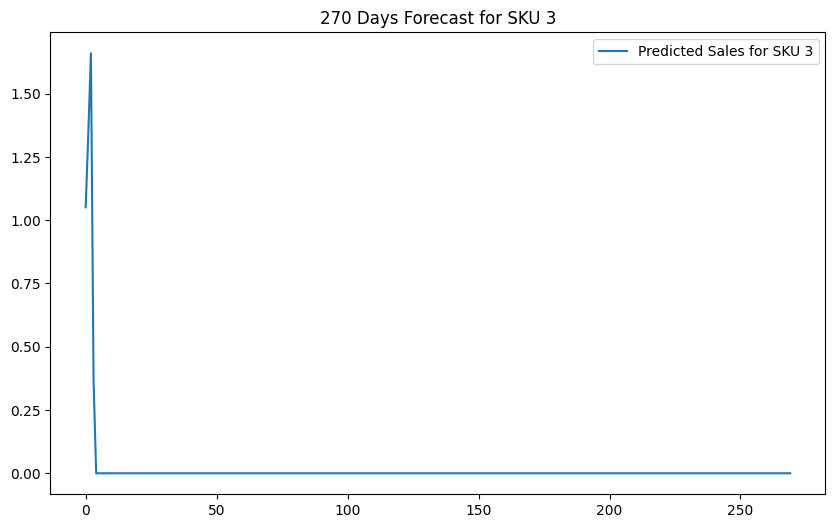

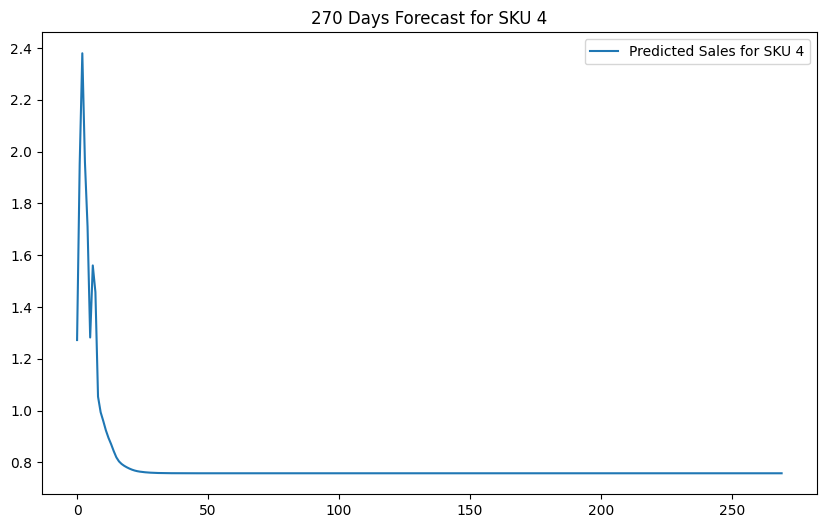

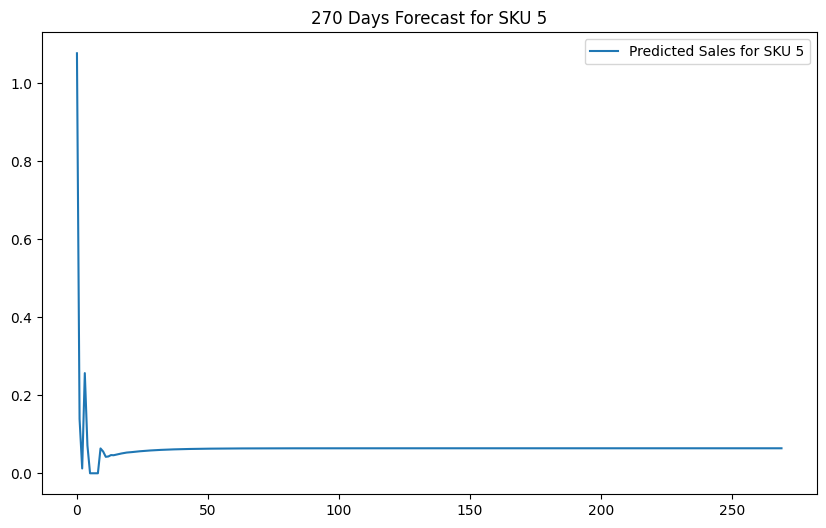

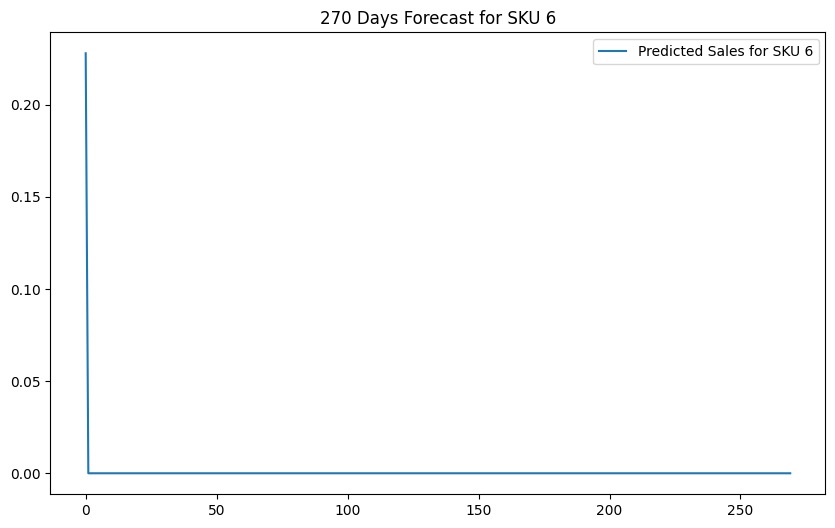

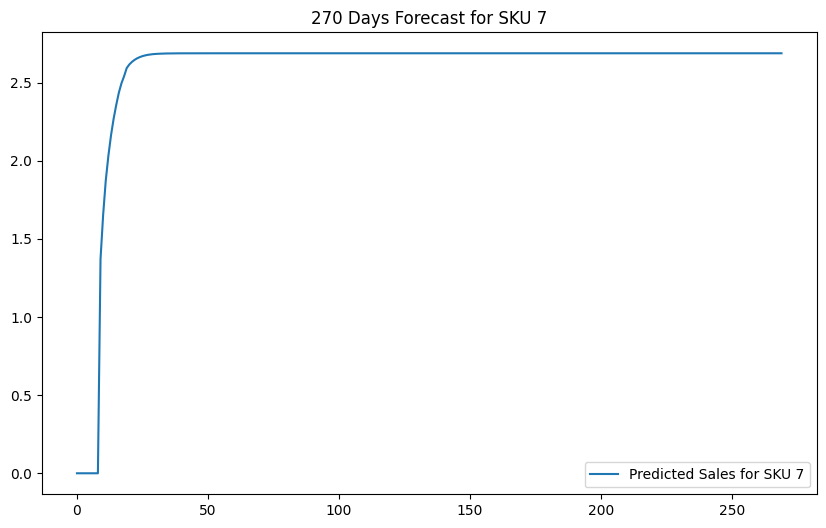

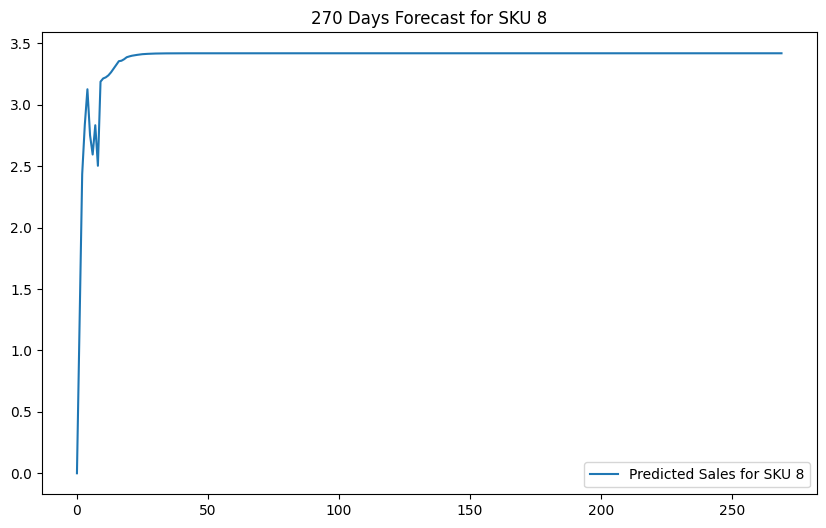

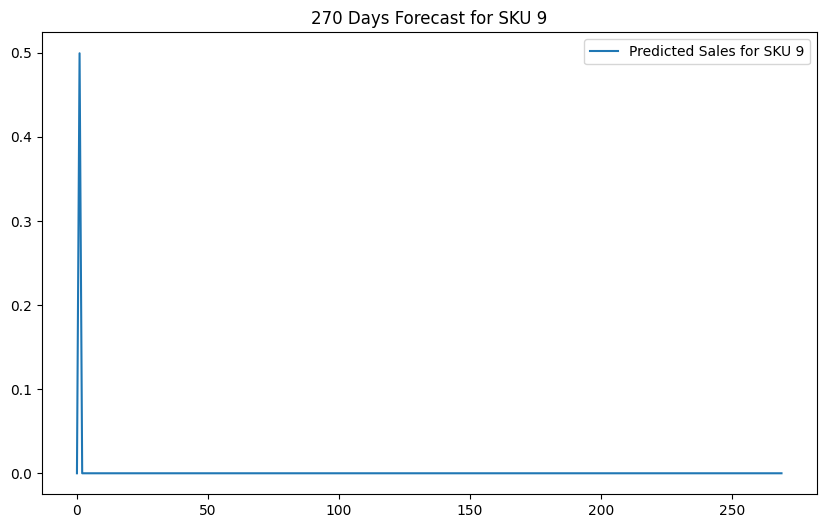

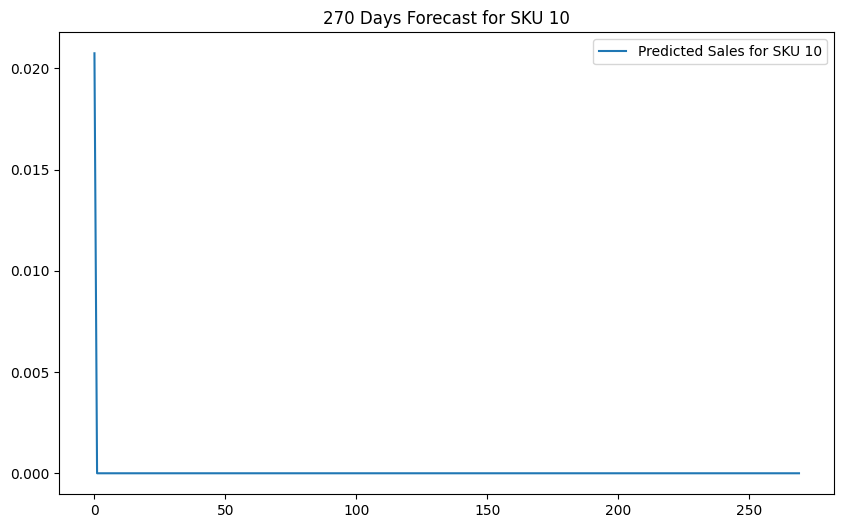

In [ ]:
for sku, pred in predictions.items():
    plt.figure(figsize=(10, 6))
    plt.plot(pred, label=f"Predicted Sales for SKU {sku}")
    plt.legend()
    plt.title(f"270 Days Forecast for SKU {sku}")
    plt.show()